In [1]:
!pip install flask

In [2]:
import pandas as pd

In [3]:
data1 = "/Users/irsyadfauzannurdin/Documents/IRSYAD/UPI Summer Course/Flask Assignment/Data_Timbulan_Sampah_SIPSN_KLHK.xlsx"

In [4]:
df = pd.read_excel(data1)

In [5]:
df

,SIPSN - Sistem Informasi Pengelolaan Sampah Nasional,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Tahun,Provinsi,Kabupaten/Kota,Timbulan Sampah Harian(ton),Timbulan Sampah Tahunan(ton)
1,2023,Aceh,Kab. Aceh Selatan,96.78,35323.53
2,2023,Aceh,Kab. Aceh Tenggara,114.15,41666.21
3,2023,Aceh,Kab. Aceh Barat,100.86,36813.72
4,2023,Aceh,Kab. Aceh Besar,148.09,54053.29
...,...,...,...,...,...
1251,2019,Papua,Kab. Biak Numfor,58.17,21232.05
1252,2019,Papua,Kota Jayapura,252.63,92211.7
1253,2019,Papua Selatan,Kab. Asmat,39,14233.54
1254,2019,Papua Barat Daya,Kab. Raja Ampat,33.13,12090.99


In [6]:
#remove the first column
df.drop(index = df.index[0], inplace = True)

In [7]:
df.rename(columns={"SIPSN - Sistem Informasi Pengelolaan Sampah Nasional":"Tahun",
          "Unnamed: 1":"Provinsi", 
          "Unnamed: 2":"Kabupaten/kota",
          "Unnamed: 3":"Timbunan_Sampah_Harian",
          "Unnamed: 4":"Timbunan_Sampah_Tahunan"},
          inplace = True)

In [8]:
df

,Tahun,Provinsi,Kabupaten/kota,Timbunan_Sampah_Harian,Timbunan_Sampah_Tahunan
1,2023,Aceh,Kab. Aceh Selatan,96.78,35323.53
2,2023,Aceh,Kab. Aceh Tenggara,114.15,41666.21
3,2023,Aceh,Kab. Aceh Barat,100.86,36813.72
4,2023,Aceh,Kab. Aceh Besar,148.09,54053.29
5,2023,Aceh,Kab. Simeulue,45.14,16476.21
...,...,...,...,...,...
1251,2019,Papua,Kab. Biak Numfor,58.17,21232.05
1252,2019,Papua,Kota Jayapura,252.63,92211.7
1253,2019,Papua Selatan,Kab. Asmat,39,14233.54
1254,2019,Papua Barat Daya,Kab. Raja Ampat,33.13,12090.99


In [9]:
Sum_Harian = df['Timbunan_Sampah_Harian'].sum()
Sum_Tahunan = df['Timbunan_Sampah_Tahunan'].sum()

In [10]:
print(f"Total of Daily Waste: {Sum_Harian}")
print(f"Total of Annual Waste: {Sum_Tahunan}")

Total of Daily Waste: 406051.74000000034
Total of Annual Waste: 148208823.94000018


In [11]:
Year_2023 = df[df["Tahun"] == 2023 ]
Year_2022 = df[df["Tahun"] == 2022 ]
Year_2021 = df[df["Tahun"] == 2021 ]
Year_2020 = df[df["Tahun"] == 2020 ]
Year_2019 = df[df["Tahun"] == 2019 ]
Year_2018 = df[df["Tahun"] == 2018 ]

In [12]:
Years = [2023, 2022, 2021, 2020, 2019, 2018]

In [13]:
Years_Sum = {}

In [14]:
for Tahun in Years:
    total_sum = df[df["Tahun"] == Tahun]['Timbunan_Sampah_Tahunan'].sum()
    Years_Sum[Tahun] = total_sum

for Tahun, total in Years_Sum.items():
    print(f"Total sum of 'Timbunan_Sampah_Tahunan' in year {Tahun} is {total}")

Total sum of 'Timbunan_Sampah_Tahunan' in year 2023 is 26889000.52000001
Total sum of 'Timbunan_Sampah_Tahunan' in year 2022 is 37595003.199999996
Total sum of 'Timbunan_Sampah_Tahunan' in year 2021 is 28459069.85
Total sum of 'Timbunan_Sampah_Tahunan' in year 2020 is 27592603.22000002
Total sum of 'Timbunan_Sampah_Tahunan' in year 2019 is 27618317.109999996
Total sum of 'Timbunan_Sampah_Tahunan' in year 2018 is 54830.04


In [15]:
# Group by province and calculate the sum and count of annual waste generation
province_group = df.groupby('Provinsi')['Timbunan_Sampah_Tahunan'].agg(['sum', 'count'])

# Calculate the average annual waste generation for each province
province_group['average_annual_waste'] = province_group['sum'] / province_group['count']


In [16]:
# Print the results
for Provinsi, row in province_group.iterrows():
    print(f"Average annual waste generation in {Provinsi} is {row['average_annual_waste']} tons")
    
# Determining which province has the most waste    
Max = Provinsi

Average annual waste generation in Aceh is 32364.708392857145 tons
Average annual waste generation in Bali is 127889.54270270273 tons
Average annual waste generation in Banten is 321941.5744444444 tons
Average annual waste generation in Bengkulu is 35670.750714285714 tons
Average annual waste generation in D.I. Yogyakarta is 147733.6222222222 tons
Average annual waste generation in DKI Jakarta is 506360.57111111097 tons
Average annual waste generation in Gorontalo is 41222.25363636364 tons
Average annual waste generation in Jambi is 57809.0456521739 tons
Average annual waste generation in Jawa Barat is 308921.27737704915 tons
Average annual waste generation in Jawa Tengah is 185556.9721311475 tons
Average annual waste generation in Jawa Timur is 164033.84510489512 tons
Average annual waste generation in Kalimantan Barat is 76275.93312500003 tons
Average annual waste generation in Kalimantan Selatan is 55017.6011111111 tons
Average annual waste generation in Kalimantan Tengah is 38690.0

In [17]:
# Ensure 'Timbunan_Sampah_Tahunan' column is numeric
df['Timbunan_Sampah_Tahunan'] = pd.to_numeric(df['Timbunan_Sampah_Tahunan'], errors='coerce')

# Group by province and calculate the sum of annual waste generation
province_total_waste = df.groupby('Provinsi')['Timbunan_Sampah_Tahunan'].sum()

# Find the province with the maximum total waste
province_with_most_waste = province_total_waste.idxmax()
max_waste = province_total_waste.max()

province_with_least_waste = province_total_waste.idxmin()
min_waste = province_total_waste.min()

print(f"The province with the most waste is {province_with_most_waste} with a total of {max_waste} tons of waste.")
print(f"The province with the least waste is {province_with_least_waste} with a total of {min_waste} tons of waste.")

The province with the most waste is Jawa Timur with a total of 23456839.85 tons of waste.
The province with the least waste is Papua Pegunungan with a total of 29483.24 tons of waste.


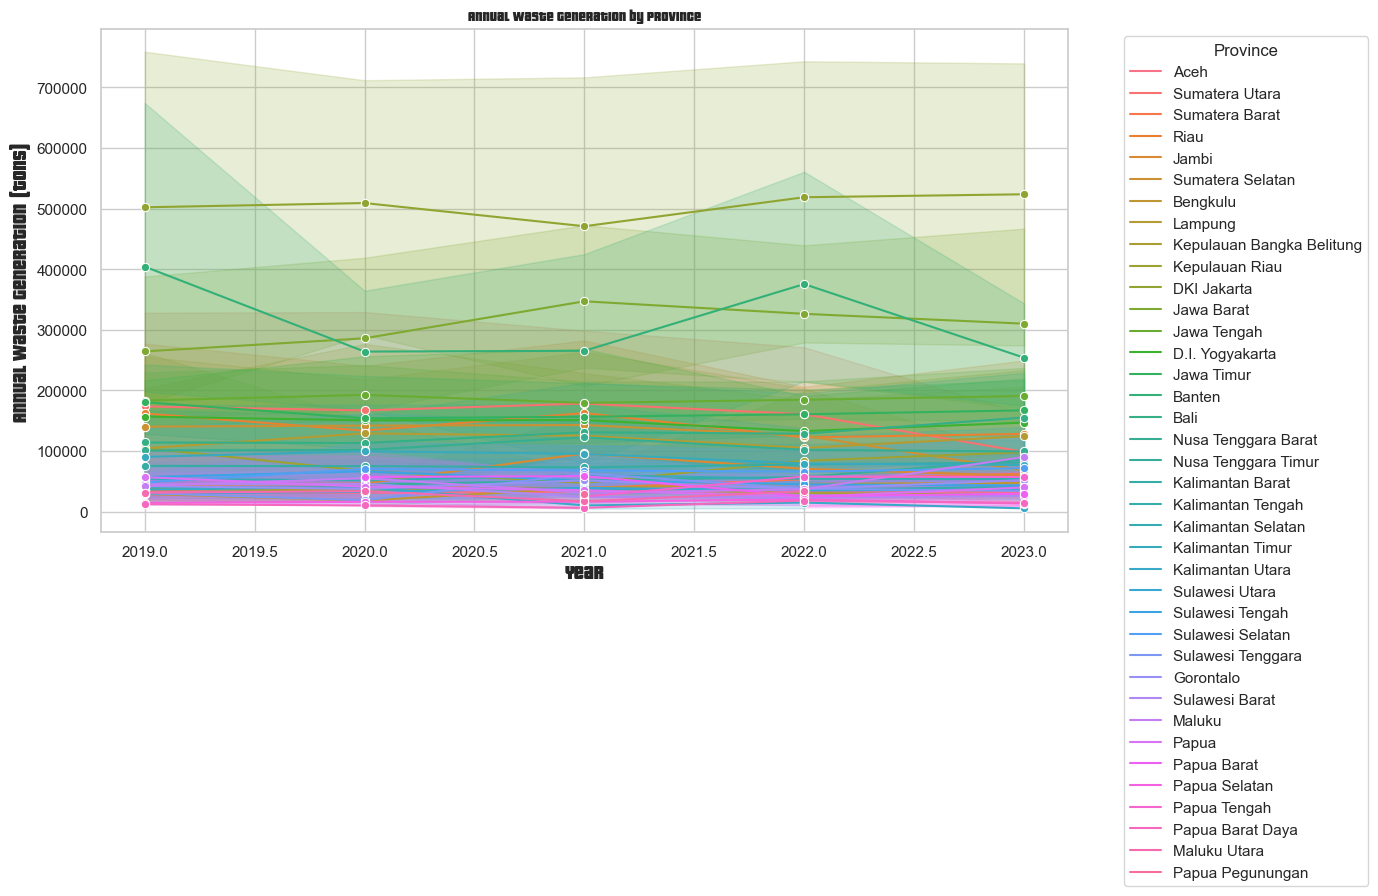

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Choose a font family (ensure the font is installed on your system)
font_path = './font.ttf'  
font_prop = font_manager.FontProperties(fname=font_path)

# Ensure 'Timbunan_Sampah_Tahunan' column is numeric
df['Timbunan_Sampah_Tahunan'] = pd.to_numeric(df['Timbunan_Sampah_Tahunan'], errors='coerce')

#exclude 2018 
df_oneskip = df[df["Tahun"]!= 2018]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_oneskip, x='Tahun', y='Timbunan_Sampah_Tahunan', hue='Provinsi', marker='o')

# Customize the plot with titles and labels
plt.title('Annual Waste Generation by Province', fontsize=16, fontproperties=font_prop)
plt.xlabel('Year', fontsize=14, fontproperties=font_prop)
plt.ylabel('Annual Waste Generation (tons)', fontsize=14, fontproperties=font_prop)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
#plt.savefig('annual_waste1.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
# Group by province and calculate the sum and count of annual waste generation
province_group = df.groupby('Provinsi')['Timbunan_Sampah_Tahunan'].agg(['sum', 'count'])

# Calculate the average annual waste generation for each province
province_group['average_annual_waste'] = province_group['sum'] / province_group['count']

print(province_group['average_annual_waste'])

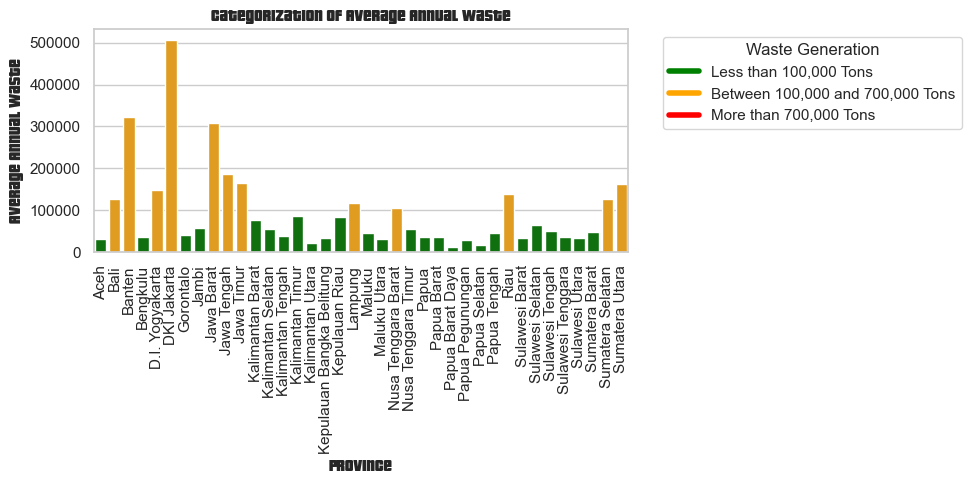

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Ensure the 'Timbunan_Sampah_Tahunan' column is numeric
df['Timbunan_Sampah_Tahunan'] = pd.to_numeric(df['Timbunan_Sampah_Tahunan'], errors='coerce')

# Calculate the average waste
province_groupmean = df.groupby('Provinsi')['Timbunan_Sampah_Tahunan'].mean().reset_index()

# Determine the color for each condition
def colprov(value):
    if value < 100000:
        return 'green'
    elif 100000 <= value < 700000:
        return 'orange'
    else:
        return 'red'

province_groupmean['Color'] = province_groupmean['Timbunan_Sampah_Tahunan'].apply(colprov)

# Choose a font family (ensure the font is installed on your system)
font_path = './font.ttf'  
font_prop = font_manager.FontProperties(fname=font_path)

# Create barplot
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=province_groupmean, x='Provinsi', y='Timbunan_Sampah_Tahunan', palette=province_groupmean['Color'])

# Aestheticize the plot
plt.title("Categorization of Average Annual Waste", fontsize=20, fontproperties= font_prop)
plt.xlabel("Province", fontsize=12, fontproperties= font_prop)
plt.ylabel("Average Annual Waste", fontsize=12, fontproperties= font_prop)
plt.xticks(rotation=90)

# Add color legend
handles = [
    plt.Line2D([0], [0], color='green', lw=4, label="Less than 100,000 Tons"),
    plt.Line2D([0], [0], color='orange', lw=4, label="Between 100,000 and 700,000 Tons"),
    plt.Line2D([0], [0], color='red', lw=4, label="More than 700,000 Tons")
]

plt.legend(title='Waste Generation', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('categorization_average_annual_waste1.png', dpi=200, bbox_inches='tight')
plt.show()



/var/folders/z8/c_x12ghd6yzd_s1j22b0dbqr0000gn/T/ipykernel_3648/4190765585.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oneskip['Timbunan_Sampah_Tahunan_Scaled'] = 1 + 6 * (df_oneskip['Timbunan_Sampah_Tahunan'] - min_value) / (max_value - min_value)


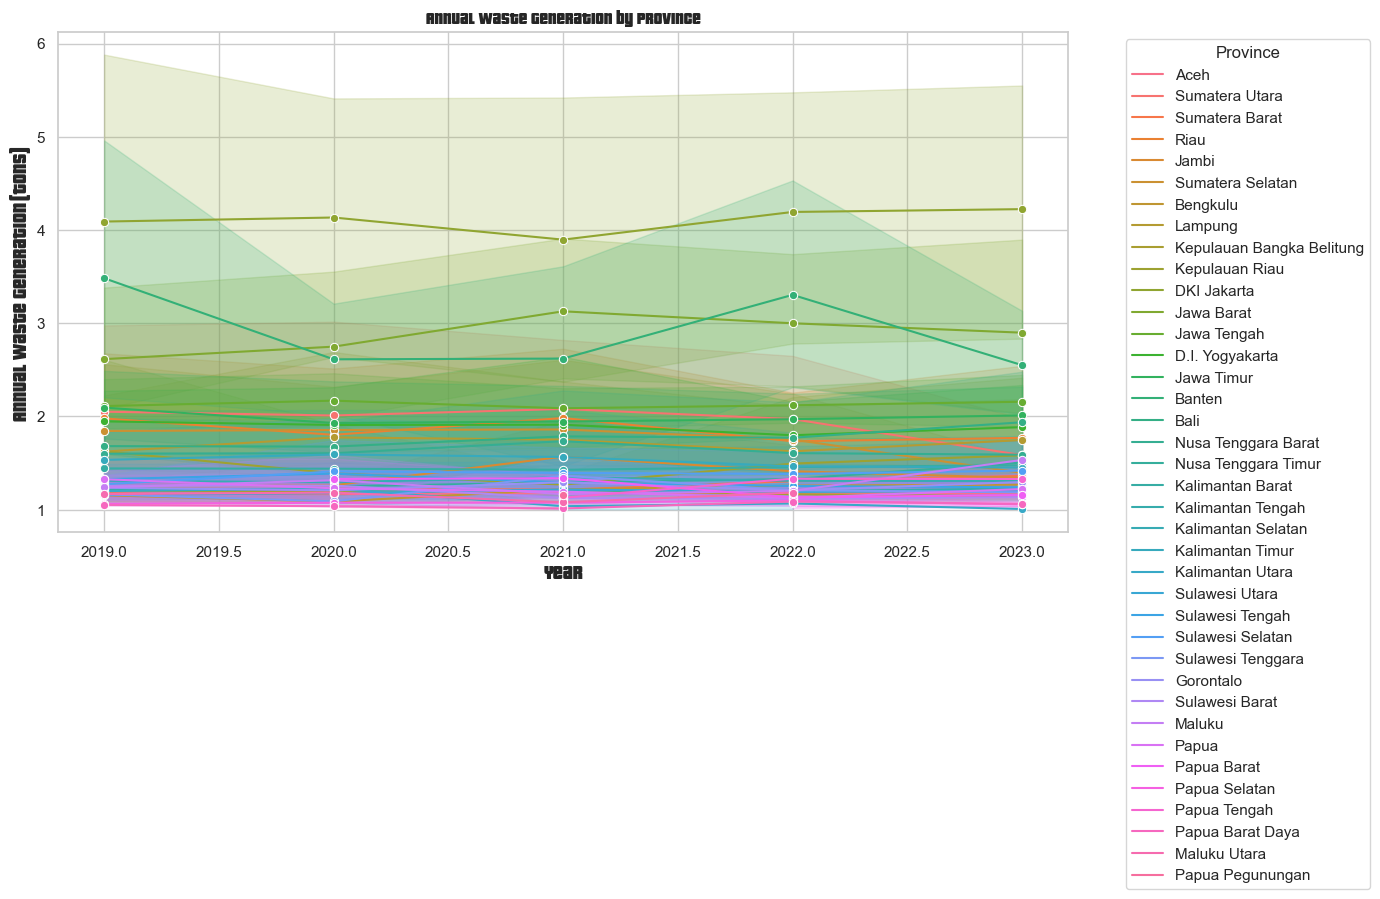

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Choose a font family (ensure the font is installed on your system)
font_path = './font.ttf'  
font_prop = font_manager.FontProperties(fname=font_path)

# Ensure 'Timbunan_Sampah_Tahunan' column is numeric
df['Timbunan_Sampah_Tahunan'] = pd.to_numeric(df['Timbunan_Sampah_Tahunan'], errors='coerce')

# Exclude 2018 
df_oneskip = df[df["Tahun"] != 2018]

# Normalize 'Timbunan_Sampah_Tahunan' to a scale of 1 to 7
min_value = df_oneskip['Timbunan_Sampah_Tahunan'].min()
max_value = df_oneskip['Timbunan_Sampah_Tahunan'].max()
df_oneskip['Timbunan_Sampah_Tahunan_Scaled'] = 1 + 6 * (df_oneskip['Timbunan_Sampah_Tahunan'] - min_value) / (max_value - min_value)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_oneskip, x='Tahun', y='Timbunan_Sampah_Tahunan_Scaled', hue='Provinsi', marker='o')

# Customize the plot with titles and labels
plt.title('Annual Waste Generation by Province', fontsize=16, fontproperties=font_prop)
plt.xlabel('Year', fontsize=14, fontproperties=font_prop)
plt.ylabel('Annual Waste Generation(TONNS)', fontsize=14, fontproperties=font_prop)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('annual_waste1.png', dpi=200, bbox_inches='tight')
plt.show()